# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [57]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [105]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat([weather1, weather2])
weather.to_csv("../data/weather/weather_data.csv", index=False)
weather.reset_index(drop=True, inplace=True)


In [145]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,year_dt
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,2006-05-31
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,2007-05-31
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,2008-05-31
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,2009-05-31
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,2010-05-31


In [107]:
# Converting years into datetime objects, so as not to include them in the .describe() output

yr_objects = pd.to_datetime(weather["year"], format='%Y')

# The default month and day are Jan 1st...
# Setting the month and day to be the end of May:

years = weather["year"]
date_strs = years.astype(str) + "-05-31"
yr_objects = pd.to_datetime(date_strs)

# Creating new column in the main DataFrame:
weather["year_dt"] = yr_objects
print(weather)

    year  rain_max   temp_avg   temp_max   temp_min    hum_max    hum_min  \
0   2006  6.670968  21.803087  27.190323  18.654839  97.129032  57.806452   
1   2007  1.866250  23.040999  27.649375  18.753125  87.837500  48.493750   
2   2008  3.777049  20.682400  27.000000  16.216393  96.136612  51.415301   
3   2009  3.380220  21.023802  27.769231  16.410440  96.054945  49.329670   
4   2010  2.183516  21.444293  28.580769  16.156044  95.247253  44.648352   
5   2011  2.601786  20.959536  27.735714  16.318132  96.060440  49.252747   
6   2012  2.255738  21.030624  28.406011  16.003279  96.060109  46.366120   
7   2013  3.079121  21.088660  27.976923  16.386813  96.802198  49.390110   
8   2014  1.617582  21.163462  28.406044  15.684066  96.214286  44.824176   
9   2015  2.876923  21.346828  28.487912  16.475275  97.450549  48.406593   
10  2016  2.641860  21.630402  28.855233  16.705233  97.587209  47.587209   
11  2017  2.052459  21.404627  28.433607  16.409016  97.155738  47.475410   

In [108]:
# TODO: describe your numeric columns
weather.describe()

# The above datetime re-assignment did not seem to exclude it from being calculated in describe
# However it does provide for some interesting statisitics (in terms of distribution of time)...

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,year_dt
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295,2014-11-29 17:20:00
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202,2006-05-31 00:00:00
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424,2010-08-30 06:00:00
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155,2014-11-29 12:00:00
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160,2019-02-28 18:00:00
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207,2023-05-31 00:00:00
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773,NaN


In [109]:
# TODO: display the null values in your dataframe
weather.isna().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
year_dt        0
dtype: int64

Equation of the line of best fit: y = -0.04x + 101.65


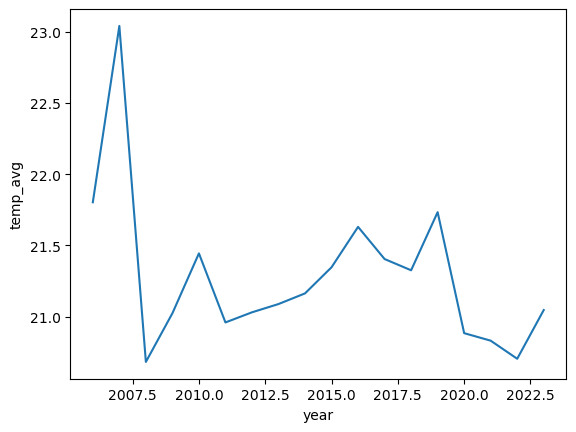

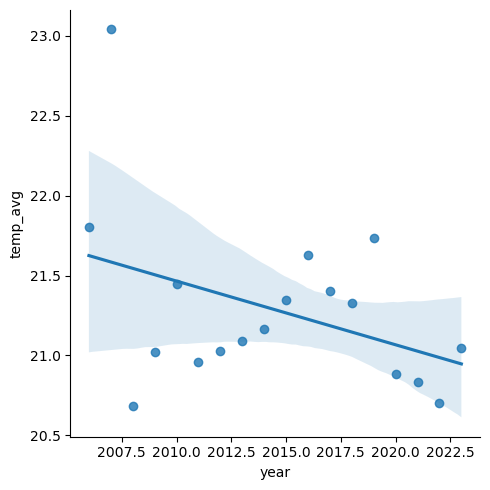

In [126]:
# TODO: BEGIN YOUR EDA!

sns.lineplot(data=weather, x="year", y="temp_avg")

sns.lmplot(data=weather, x="year", y="temp_avg")

coeffs = np.polyfit(weather["year"].values, weather["temp_avg"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

Equation of the line of best fit: y = -0.20x + 460.39


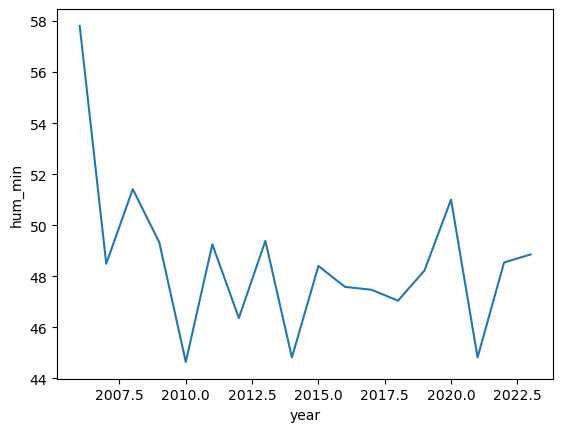

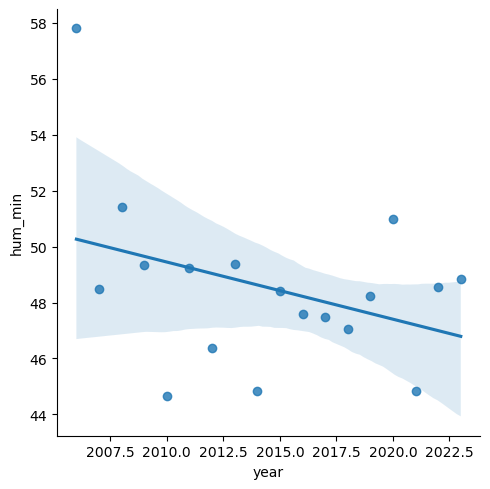

In [127]:
sns.lineplot(data=weather, x="year", y="hum_min")

# Similarly, including a line of best fit as above

sns.lmplot(data=weather, x="year", y="hum_min")

coeffs = np.polyfit(weather["year"].values, weather["hum_min"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

Equation of the line of best fit: y = -0.07x + 144.84


,wind_avg,temp_avg
wind_avg,1.000000,0.476529
temp_avg,0.476529,1.000000


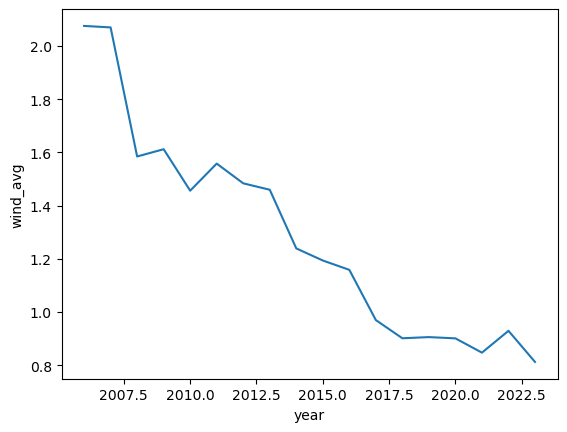

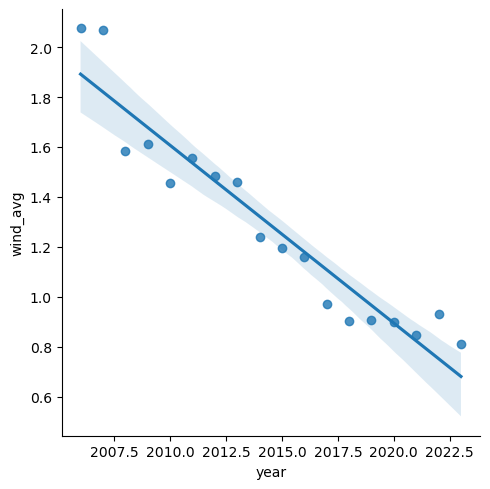

In [129]:
sns.lineplot(data=weather, x="year", y="wind_avg")

sns.lmplot(data=weather, x="year", y="wind_avg")

coeffs = np.polyfit(weather["year"].values, weather["wind_avg"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

weather[["wind_avg", "temp_avg"]].corr()

YEAR W MAX RAIN:  0    2006
Name: year, dtype: int64


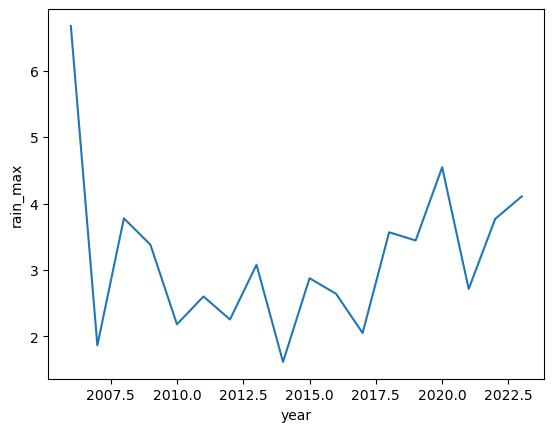

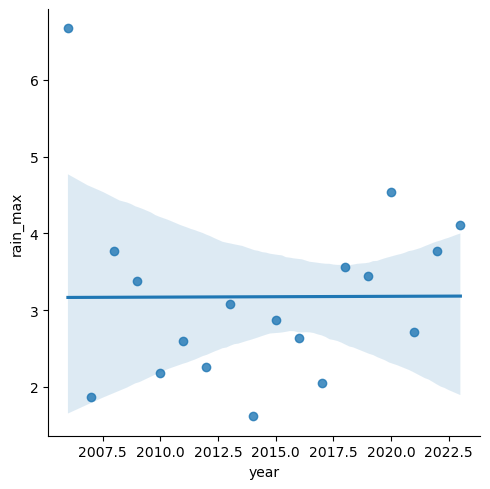

In [123]:
sns.lineplot(data=weather, x="year", y="rain_max")
r_max = weather["rain_max"].max()
print("YEAR W MAX RAIN: ", weather[weather["rain_max"] == r_max]["year"])

sns.lmplot(data=weather, x="year", y="rain_max")

,rain_max,hum_max
rain_max,1.000000,0.405782
hum_max,0.405782,1.000000


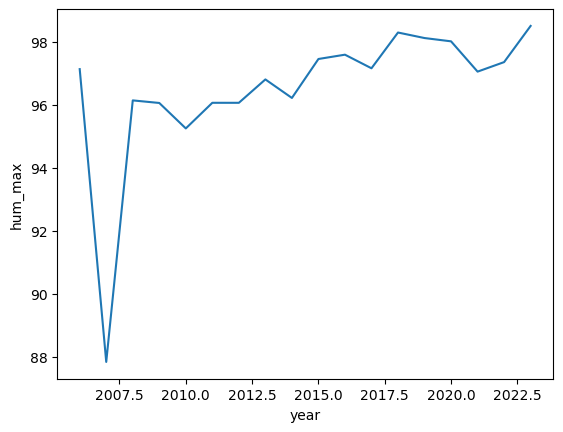

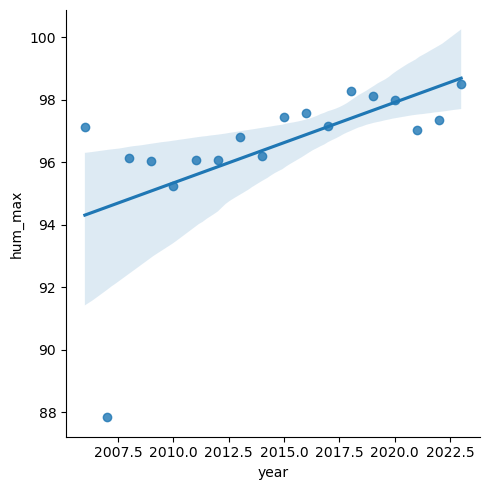

In [134]:
sns.lineplot(data=weather, x="year", y="hum_max")

sns.lmplot(data=weather, x="year", y="hum_max")

weather[["rain_max", "hum_max"]].corr()

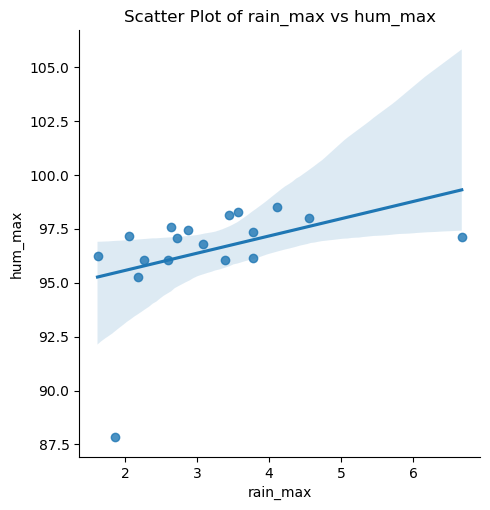

Equation of the line of best fit: y = 0.80x + 93.96


In [139]:
sns.lmplot(data=weather, x="rain_max", y="hum_max")
plt.title("Scatter Plot of rain_max vs hum_max")
plt.show()

coeffs = np.polyfit(weather["rain_max"].values, weather["hum_max"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

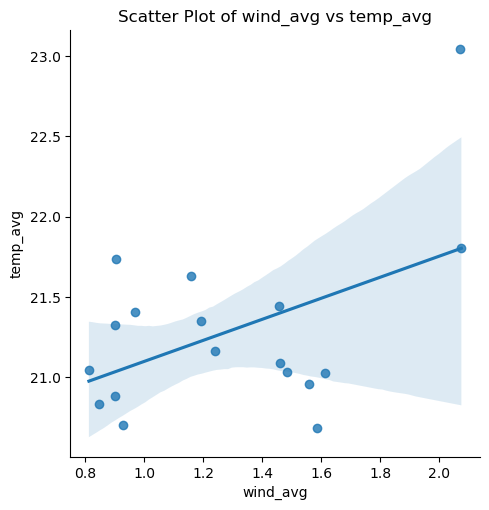

Equation of the line of best fit: y = 0.65x + 20.44


In [140]:
sns.lmplot(data=weather, x="wind_avg", y="temp_avg")
plt.title("Scatter Plot of wind_avg vs temp_avg")
plt.show()

coeffs = np.polyfit(weather["wind_avg"].values, weather["temp_avg"].values, 1)
slope = coeffs[0]
intercept = coeffs[1]
print(f"Equation of the line of best fit: y = {slope:.2f}x + {intercept:.2f}")

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: Average temperature is decreasing overall, but in a very fluctuating way. Using a line of best fit we can see that it is decreasing at a rate of 0.04 degrees per year.

How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: Similar to average temperature, minimum humidity appears to be decreasing over the years at a rate of .2% per year.

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: Wind speed is decreasing sharply over the years, at a much faster rate than average temperature and humidity, at a rate of 0.07 meters per second a year.

Which year had the highest maximum record rainfall?

Ans: 2006 had the maximum record rainfall.

What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: Maximum rain and humidity appear to share a similar trend in their graphs and plotted against each other we can see that for every millimeter of rain, humidity increases by 1%. Using the Pearson's correlation coefficent we get a coefficent of 0.406, which indicates a moderately positive linear relationship.

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: The graphs of both average wind speed and average temperature appear to be decreasing together, although at different rates (-0.07 vs -0.04). Judging on their correlation coefficent of 0.477, it can be said that they too have a moderately positive linear relationship, and for every change in wind speed (in meters per second) the temperature changes by 0.65 degrees Celsius.